In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, PchipInterpolator

In [40]:
t = np.array(range(0, 100, 10))
flow_rate = np.array([45, 32, 0, 0, 7, 12, 20, 15, 29, 55])

Text(0.5, 1.0, 'Interpolation Comparison of spline and pchip Methods')

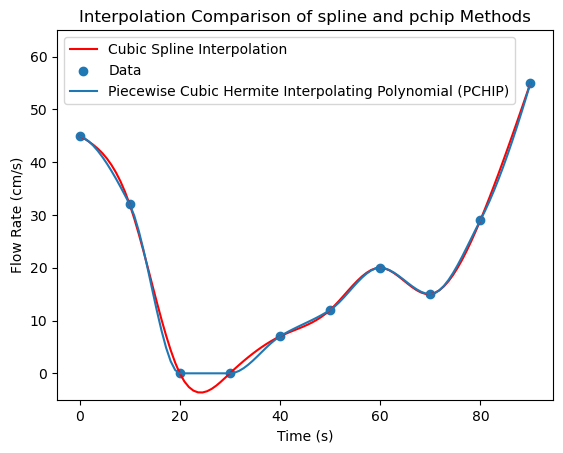

In [41]:
f_spline = CubicSpline(t, flow_rate, bc_type='natural')
x = np.linspace(0, 90, 100)
y = f_spline(x)
plt.plot(x, y, 'r-')
plt.scatter(t, flow_rate)
f_pchip = PchipInterpolator(t, flow_rate)
new_x = x
new_y = f_pchip(new_x)
plt.plot(new_x, new_y)
plt.legend(["Cubic Spline Interpolation", "Data" ,"Piecewise Cubic Hermite Interpolating Polynomial (PCHIP)"])
plt.xlabel("Time (s)")
plt.ylabel("Flow Rate (cm/s)")
upper_bound = 65
lower_bound = -5
plt.ylim((lower_bound, upper_bound))
plt.title("Interpolation Comparison of spline and pchip Methods")

The problem is that between 20s and 30s flow-rate is 0. There is no drop in flow rates. CubicSpline doesn't account for this but pchip does. Also flow rates physically cannot be negative. 

(-10.0, 10.0)

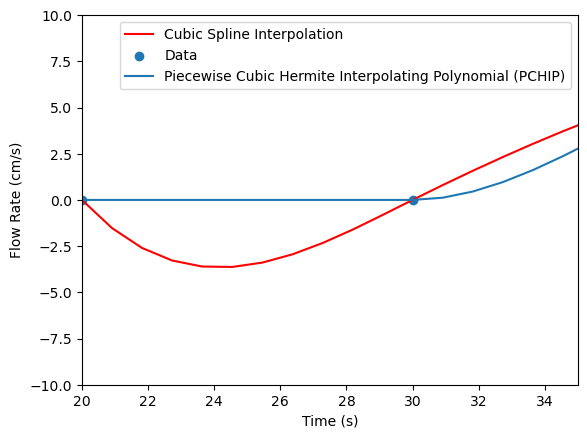

In [42]:
f_spline = CubicSpline(t, flow_rate, bc_type='natural')
x = np.linspace(0, 90, 100)
y = f_spline(x)
plt.plot(x, y, 'r-')
plt.scatter(t, flow_rate)
f_pchip = PchipInterpolator(t, flow_rate)
new_x = x
new_y = f_pchip(new_x)
plt.plot(new_x, new_y)
plt.legend(["Cubic Spline Interpolation", "Data" ,"Piecewise Cubic Hermite Interpolating Polynomial (PCHIP)"])
plt.xlabel("Time (s)")
plt.ylabel("Flow Rate (cm/s)")
lower_bound = -10
upper_bound = 10

left_bound = 20
right_bound = 35

plt.xlim((left_bound, right_bound))
plt.ylim((lower_bound, upper_bound))

[4.3629999999999995, 1.0422, -2.282, -5.1667, -7.329000000000001, -8.302, -7.2989999999999995, -3.0600000000000005, 6.508000000000001, 24.897]


Text(0, 0.5, 'dP/df')

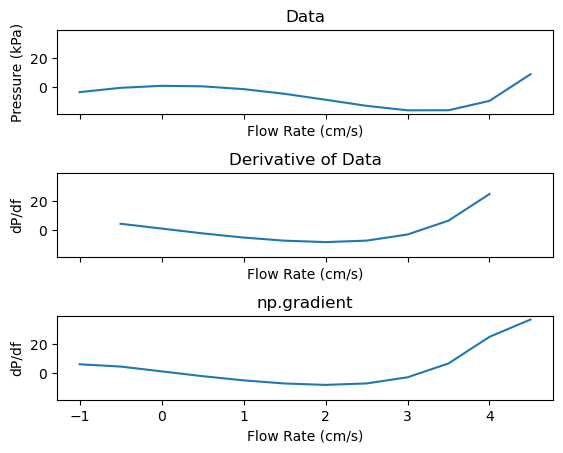

In [92]:
flow_rate = np.array(np.arange(-1, 5, .5))
pressure_drop = np.array([-3.363, -0.3935, 1.0, .6487, -1.2820, -4.518, -8.611, -12.82, -15.91, -15.88, -9.402, 9.0170])


derivative = []
h = 0.5

for i in range(1, len(pressure_drop)-1):
    result = pressure_drop[i+1]-pressure_drop[i-1]
    derivative.append(result)
print(derivative)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.subplots_adjust(hspace=.7)
ax1.plot(flow_rate, pressure_drop)
ax1.set_xlabel("Flow Rate (cm/s)")
ax1.set_ylabel("Pressure (kPa)")
ax1.set_title("Data")

ax2.plot(flow_rate[1:-1], derivative)
ax2.set_title("Derivative of Data")
ax2.set_xlabel("Flow Rate (cm/s)")
ax2.set_ylabel("dP/df")

gradient = np.gradient(pressure_drop, flow_rate)
ax3.plot(flow_rate, gradient)
ax3.set_title("np.gradient")
ax3.set_xlabel("Flow Rate (cm/s)")
ax3.set_ylabel("dP/df")

In [93]:
gradient1 = np.gradient(pressure_drop, flow_rate)
print(gradient1)

[ 5.939   4.363   1.0422 -2.282  -5.1667 -7.329  -8.302  -7.299  -3.06
  6.508  24.897  36.838 ]


In [109]:
import sympy as sym
vo = 1
k = .23

x = sym.Symbol("x")
func = (1/(1-x))
conversion_out = .5
conversion_in = 0

integral = sym.integrate(func, x)
integral_eval = integral.subs(x, conversion_out) - integral.subs(x, conversion_in)
print(func)
print(integral)
print(f'To have a conversion of {conversion_out} for the PFR you need a volume of {integral_eval*vo/k} Liters or dm3')

1/(1 - x)
-log(x - 1)
To have a conversion of 0.5 for the PFR you need a volume of 3.01368339373889 Liters or dm3
